# How do qq-plots look like for different kinds of distributions? 

In [1]:
from dataset_noise_generator import *
from plotting import *

C:\Users\TK\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np

# Generate ideal data 

Ideal X, y drawn from some distribution


$ y_i = \beta_0 + \beta_1 x_i$

In [3]:
num_indep = 1
n_sample = 1000

# X_base, y_base, coeffs = make_regression_custom(n_samples=n_sample, n_features=num_indep, n_informative=num_indep,
#                    tail_strength=0, bias=0, n_targets=1, noise=0, 
#                        shuffle=False, coef=True, random_state=2, custom_coef=[1])


Here let's make X drawn from a uniform distribution. Let's make y equal to x - let's say we want to fit a line where slope = 1 and intercept = 0. That's our ground truth

In [4]:
X_base = 10*np.random.uniform(0,1,n_sample).reshape((n_sample,1))
y_base = np.squeeze(X_base)

(array([ 98., 105., 109.,  90., 122.,  87., 101., 101., 101.,  86.]),
 array([8.77563192e-03, 1.00781800e+00, 2.00686037e+00, 3.00590275e+00,
        4.00494512e+00, 5.00398749e+00, 6.00302986e+00, 7.00207223e+00,
        8.00111460e+00, 9.00015697e+00, 9.99919934e+00]),
 <BarContainer object of 10 artists>)

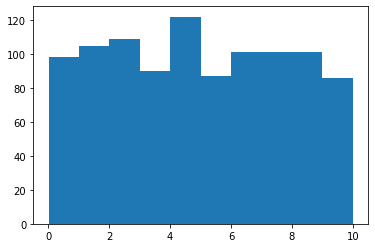

In [38]:
plt.hist(y_base)

In [5]:
X_train, y_train, model, fitted = train_xy(X_base,y_base)

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.639e+33
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:58:17   Log-Likelihood:                 25959.
No. Observations:                 800   AIC:                        -5.191e+04
Df Residuals:                     798   BIC:                        -5.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.106e-16   1.38e-16     -4.412      0.000   -8.82e-16   -3.39e-16
x1             1.0000   2.47e-17   4.05e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      186.448   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.405
Skew:                          -0.294   Prob(JB):                     1.38e-10
Kurtosis:                       1.992   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Y with normally distributed noise

In [7]:
y1 = y_base + gen_noise(y_base,1,'normal')

(array([  3.,  10.,  43., 155., 282., 267., 178.,  49.,   9.,   4.]),
 array([-3.71802061, -2.96946946, -2.22091831, -1.47236716, -0.72381601,
         0.02473514,  0.77328629,  1.52183745,  2.2703886 ,  3.01893975,
         3.7674909 ]),
 <BarContainer object of 10 artists>)

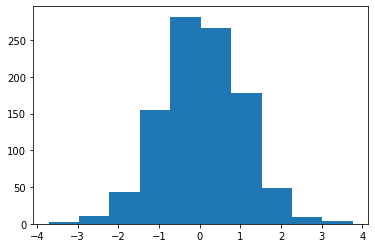

In [40]:
plt.hist(gen_noise(y_base,1,'normal'))

(array([134., 242., 234., 246., 112.,  17.,   4.,   5.,   1.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.27965651,  2.74020804,  5.20075958,  7.66131111, 10.12186265,
        12.58241418, 15.04296572, 17.50351725, 19.96406878, 22.42462032,
        24.88517185, 27.34572339, 29.80627492, 32.26682646, 34.72737799,
        37.18792953, 39.64848106, 42.1090326 , 44.56958413, 47.03013567,
        49.4906872 ]),
 <BarContainer object of 20 artists>)

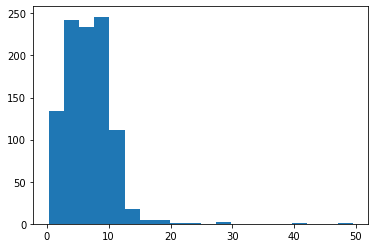

In [39]:
plt.hist(y1, bins=20)

In [8]:
X_train1, y_train1, model1, fitted1 = train_xy(X_base,y1)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     6090.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:58:17   Log-Likelihood:                -1130.4
No. Observations:                 800   AIC:                             2265.
Df Residuals:                     798   BIC:                             2274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.070      2.315      0.021       0.025       0.301
x1             0.9796      0.013     78.039      0.000       0.955       1.004
==============================================================================
Omnibus:                        1.654   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.600
Skew:                          -0.109   Prob(JB):                        0.449
Kurtosis:                       3.012   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model1.fittedvalues; # predictions

model1.resid; # residuals

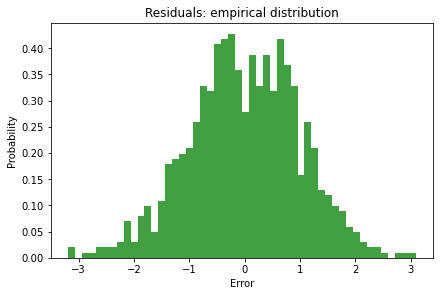

In [10]:
plot_residuals_distribution(model1.resid)

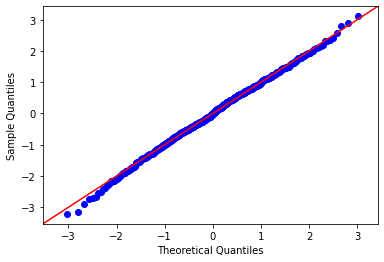

In [11]:
ftmp = sm.qqplot(model1.resid / np.std(model1.resid), line="45")

# Y with log-normal errors

In [32]:
y3 = y_base + np.exp(gen_noise(y_base,1,'normal'))

(array([761., 171.,  36.,  13.,   9.,   3.,   1.,   0.,   2.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([2.42819837e-02, 2.18663570e+00, 4.34898942e+00, 6.51134314e+00,
        8.67369686e+00, 1.08360506e+01, 1.29984043e+01, 1.51607580e+01,
        1.73231117e+01, 1.94854654e+01, 2.16478192e+01, 2.38101729e+01,
        2.59725266e+01, 2.81348803e+01, 3.02972340e+01, 3.24595878e+01,
        3.46219415e+01, 3.67842952e+01, 3.89466489e+01, 4.11090026e+01,
        4.32713563e+01]),
 <BarContainer object of 20 artists>)

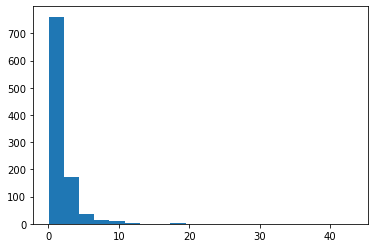

In [43]:
plt.hist(np.exp(gen_noise(y_base,1,'normal')),bins=20)

(array([134., 242., 234., 246., 112.,  17.,   4.,   5.,   1.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.27965651,  2.74020804,  5.20075958,  7.66131111, 10.12186265,
        12.58241418, 15.04296572, 17.50351725, 19.96406878, 22.42462032,
        24.88517185, 27.34572339, 29.80627492, 32.26682646, 34.72737799,
        37.18792953, 39.64848106, 42.1090326 , 44.56958413, 47.03013567,
        49.4906872 ]),
 <BarContainer object of 20 artists>)

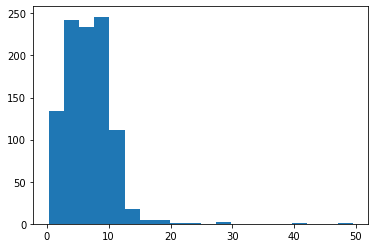

In [44]:
plt.hist(y3, bins=20)

In [33]:
X_train3, y_train3, model3, _ = train_xy(X_base,y3)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1299.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          1.50e-169
Time:                        01:01:44   Log-Likelihood:                -1719.5
No. Observations:                 800   AIC:                             3443.
Df Residuals:                     798   BIC:                             3452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9924      0.147     13.564      0.000       1.704       2.281
x1             0.9446      0.026     36.035      0.000       0.893       0.996
==============================================================================
Omnibus:                      738.520   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27934.569
Skew:                           4.140   Prob(JB):                         0.00
Kurtosis:                      30.739   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

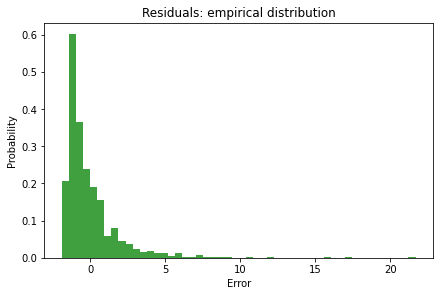

In [35]:
plot_residuals_distribution(model3.resid)

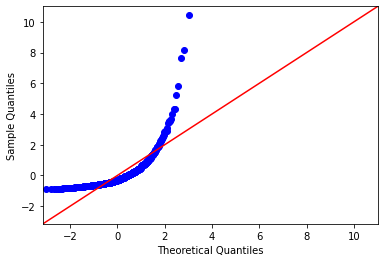

In [36]:
ftmp = sm.qqplot(model3.resid / np.std(model3.resid), line="45")

# Y with Cauchy distributed noise

Here we scale the Cauchy numbers by 0.5 to have comparable numbers 

In [23]:
y2 = y_base + gen_noise(y_base,0.5,'cauchy', truncate=25)

1000.0
28


(array([ 98., 105., 109.,  90., 122.,  87., 101., 101., 101.,  86.]),
 array([8.77563192e-03, 1.00781800e+00, 2.00686037e+00, 3.00590275e+00,
        4.00494512e+00, 5.00398749e+00, 6.00302986e+00, 7.00207223e+00,
        8.00111460e+00, 9.00015697e+00, 9.99919934e+00]),
 <BarContainer object of 10 artists>)

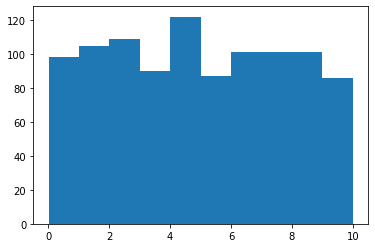

In [24]:
plt.hist(y_base)

1000.0
28


(array([  4.,   7.,  21.,  55., 730., 147.,  18.,   9.,   8.,   1.]),
 array([-10.77387675,  -8.4656911 ,  -6.15750544,  -3.84931979,
         -1.54113413,   0.76705152,   3.07523718,   5.38342284,
          7.69160849,   9.99979415,  12.3079798 ]),
 <BarContainer object of 10 artists>)

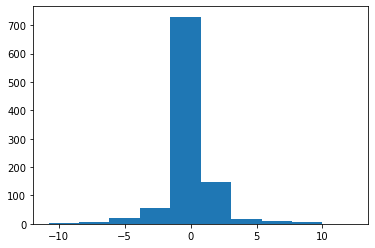

In [26]:
plt.hist(gen_noise(y_base,0.5,'cauchy', truncate=25))

(array([  2.,   8.,  32., 185., 274., 251., 203.,  33.,   8.,   4.]),
 array([-8.45834295, -5.80327863, -3.14821431, -0.49314998,  2.16191434,
         4.81697866,  7.47204299, 10.12710731, 12.78217163, 15.43723596,
        18.09230028]),
 <BarContainer object of 10 artists>)

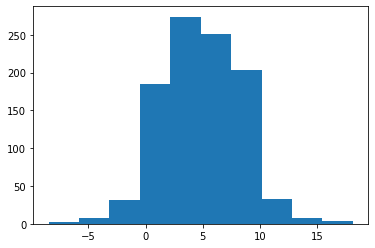

In [27]:
plt.hist(y2)

In [28]:
_, _, model2, _ = train_xy(X_base,y2)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1974.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          5.91e-218
Time:                        00:59:43   Log-Likelihood:                -1623.7
No. Observations:                 800   AIC:                             3251.
Df Residuals:                     798   BIC:                             3261.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1384      0.130     -1.062      0.289      -0.394       0.117
x1             1.0332      0.023     44.426      0.000       0.988       1.079
==============================================================================
Omnibus:                      190.646   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3775.347
Skew:                           0.533   Prob(JB):                         0.00
Kurtosis:                      13.589   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

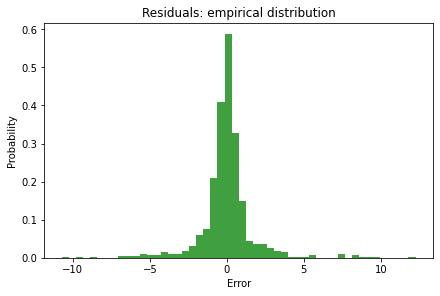

In [29]:
plot_residuals_distribution(model2.resid)

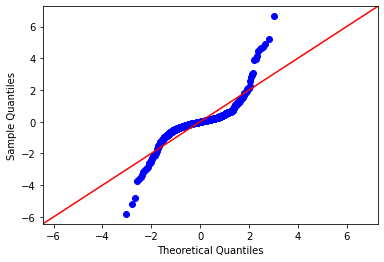

In [30]:
ftmp = sm.qqplot(model2.resid / np.std(model2.resid), line="45")